In [1]:
import cv2
import os
from pathlib import Path
from tqdm import tqdm

# Caminhos
raw_video_dir = Path("../data/raw")
output_frame_dir = Path("../data/frames")
output_frame_dir.mkdir(parents=True, exist_ok=True)

# Definições
FRAME_RATE = 1  # 1 frame por segundo
FRAME_SIZE = (224, 224)  # Resolução dos frames

In [2]:
def extract_frames(video_path, output_dir, rate=1, resize=(224, 224)):
    cap = cv2.VideoCapture(str(video_path))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_interval = int(round(fps / rate))

    count = 0
    saved = 0
    success = True

    while success:
        success, frame = cap.read()
        if not success:
            break
        if count % frame_interval == 0:
            resized = cv2.resize(frame, resize)
            frame_name = f"{video_path.stem}_frame_{saved:04d}.jpg"
            cv2.imwrite(str(output_dir / frame_name), resized)
            saved += 1
        count += 1

    cap.release()
    return saved


In [3]:
video_files = list(raw_video_dir.glob("*.mp4"))
print(f"🎬 Encontrados {len(video_files)} vídeos.")

for video_path in tqdm(video_files):
    video_id = video_path.stem
    output_path = output_frame_dir / video_id
    output_path.mkdir(parents=True, exist_ok=True)

    n_saved = extract_frames(video_path, output_path, rate=FRAME_RATE, resize=FRAME_SIZE)
    print(f"{video_id}: {n_saved} frames guardados.")


🎬 Encontrados 30 vídeos.


  0%|          | 0/30 [00:00<?, ?it/s]

  3%|▎         | 1/30 [00:15<07:20, 15.20s/it]

C33I: 307 frames guardados.


  7%|▋         | 2/30 [00:30<07:00, 15.01s/it]

B36R: 305 frames guardados.


 10%|█         | 3/30 [00:44<06:40, 14.82s/it]

C46R: 305 frames guardados.


 13%|█▎        | 4/30 [00:59<06:29, 14.98s/it]

B61D: 305 frames guardados.


 17%|█▋        | 5/30 [01:14<06:09, 14.77s/it]

C36X: 304 frames guardados.


 20%|██        | 6/30 [01:29<05:56, 14.84s/it]

C16G: 305 frames guardados.


 23%|██▎       | 7/30 [01:43<05:38, 14.72s/it]

C58C: 309 frames guardados.


 27%|██▋       | 8/30 [01:58<05:22, 14.66s/it]

A99X: 304 frames guardados.


 30%|███       | 9/30 [02:13<05:09, 14.75s/it]

A61V: 305 frames guardados.


 33%|███▎      | 10/30 [02:27<04:54, 14.73s/it]

A40E: 305 frames guardados.


 37%|███▋      | 11/30 [02:42<04:39, 14.71s/it]

C42I: 302 frames guardados.


 40%|████      | 12/30 [02:57<04:24, 14.72s/it]

A99Y: 304 frames guardados.


 43%|████▎     | 13/30 [03:12<04:11, 14.82s/it]

A83X: 304 frames guardados.


 47%|████▋     | 14/30 [03:29<04:06, 15.41s/it]

C43T: 303 frames guardados.


 50%|█████     | 15/30 [03:44<03:48, 15.27s/it]

B53D: 305 frames guardados.


 53%|█████▎    | 16/30 [04:00<03:38, 15.60s/it]

A88O: 320 frames guardados.


 57%|█████▋    | 17/30 [04:15<03:21, 15.50s/it]

C56Y: 311 frames guardados.


 60%|██████    | 18/30 [04:30<03:05, 15.43s/it]

A92O: 305 frames guardados.


 63%|██████▎   | 19/30 [04:46<02:49, 15.40s/it]

C48S: 310 frames guardados.


 67%|██████▋   | 20/30 [05:01<02:32, 15.20s/it]

A41X: 305 frames guardados.


 70%|███████   | 21/30 [05:15<02:16, 15.12s/it]

C18X: 304 frames guardados.


 73%|███████▎  | 22/30 [05:31<02:01, 15.18s/it]

B68G: 306 frames guardados.


 77%|███████▋  | 23/30 [05:46<01:46, 15.15s/it]

A31H: 303 frames guardados.


 80%|████████  | 24/30 [06:01<01:29, 15.00s/it]

A59Z: 302 frames guardados.


 83%|████████▎ | 25/30 [06:16<01:15, 15.09s/it]

A36O: 304 frames guardados.


 87%|████████▋ | 26/30 [06:31<01:00, 15.07s/it]

B12G: 304 frames guardados.


 90%|█████████ | 27/30 [06:46<00:45, 15.15s/it]

C28D: 304 frames guardados.


 93%|█████████▎| 28/30 [07:01<00:29, 14.95s/it]

A66S: 306 frames guardados.


 97%|█████████▋| 29/30 [07:16<00:15, 15.05s/it]

A80U: 306 frames guardados.


100%|██████████| 30/30 [07:37<00:00, 15.25s/it]

B88L: 304 frames guardados.


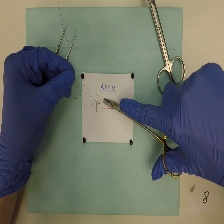

In [4]:
from IPython.display import Image, display
import random

sample_dir = random.choice(list(output_frame_dir.glob("*")))
sample_frame = random.choice(list(sample_dir.glob("*.jpg")))

display(Image(filename=str(sample_frame)))

In [5]:
total_videos = len(list(output_frame_dir.glob("*")))
total_frames = len(list(output_frame_dir.glob("*/*.jpg")))

print(f"✅ Extração completa.")
print(f"🎥 Vídeos processados: {total_videos}")
print(f"🖼️ Frames totais gerados: {total_frames}")

✅ Extração completa.
🎥 Vídeos processados: 30
🖼️ Frames totais gerados: 18332
